
**Objective and Data Description**

1. I sourced this dataset from Kaggle. My dataset is called 'Student Performance'. It tracks the grades of students in addition to many factors that may affect their academic performance, such as their sex, their class attendance, and how often they study.

2. My research object is to learn to utilize PCA and clustering on my student performance dataset and see if it performs well.

3. My research question is to predict student's grades using the best version of clustering. I will start by testing the accuracy of testing clustering and PCA to see how well it predicts student's grades off of their weekly study hours.



In [ ]:
#Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline

**Numerical Summaries**

In [ ]:
#Step 1: Read the data
# Read the data, print the shape and first 5 rows.
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()
studentdata = pd.read_csv(io.BytesIO(uploaded['StudentsPerformance.csv']))

Saving StudentsPerformance.csv to StudentsPerformance.csv


In [ ]:
print(studentdata.shape)
print(studentdata.head())
print(studentdata.describe())
types = studentdata.dtypes
print(types)

(145, 33)
  STUDENT ID  Student Age  Sex  Graduated high-school type  Scholarship type  \
0   STUDENT1            2    2                           3                 3   
1   STUDENT2            2    2                           3                 3   
2   STUDENT3            2    2                           2                 3   
3   STUDENT4            1    1                           1                 3   
4   STUDENT5            2    2                           1                 3   

   Additional work  Regular artistic or sports activity  \
0                1                                    2   
1                1                                    2   
2                2                                    2   
3                1                                    2   
4                2                                    2   

   Do you have a partner  Total salary if available  \
0                      2                          1   
1                      2                    

**Algorithm Implementation**

[0.10335045 0.08848005 0.07309574 0.06586722 0.0584752  0.04918734
 0.04465425 0.04169343 0.03963303 0.03706727 0.033998   0.03127413
 0.03007652 0.02806073 0.0257676  0.02439112 0.02417154 0.02022053
 0.01954542 0.01896148 0.01758455 0.01715449 0.01497602 0.01427451
 0.01287931 0.01220093 0.01146294 0.01070642 0.00945564 0.00816823
 0.00769676 0.00546916]
    0    1    2    3    4    5    6    7    8    9   ...   22   23   24   25  \
0  1.0  1.0  2.0 -1.0 -1.0  1.0  1.0 -1.0 -1.0 -1.0  ... -1.0 -0.0  1.0 -0.0   
1  1.0  1.0  0.0 -1.0  1.0  1.0  1.0  0.0  2.0  0.0  ... -1.0 -0.0 -1.0 -0.0   
2 -1.0 -1.0 -2.0 -1.0 -1.0  1.0 -1.0  0.0 -1.0  0.0  ... -1.0  2.0  1.0 -0.0   
3  1.0  1.0 -2.0 -1.0  1.0  1.0 -1.0  1.0 -1.0  3.0  ...  1.0 -0.0 -1.0 -0.0   
4  1.0  1.0  0.0 -1.0  1.0  1.0  1.0  0.0 -1.0 -1.0  ... -1.0 -0.0 -3.0 -0.0   

    26   27   28   29   30   31  
0  1.0  0.0 -1.0  0.0 -1.0 -1.0  
1 -2.0 -1.0 -1.0 -1.0 -1.0 -1.0  
2 -1.0 -1.0 -0.0 -1.0 -1.0 -1.0  
3 -1.0 -1.0 -1.0 -1.0 -1

,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,Accommodation type in Cyprus,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,1
3,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
4,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,1
5,2,2,2,3,2,2,2,2,1,1,...,1,1,1,2,1,2,4,4,1,2


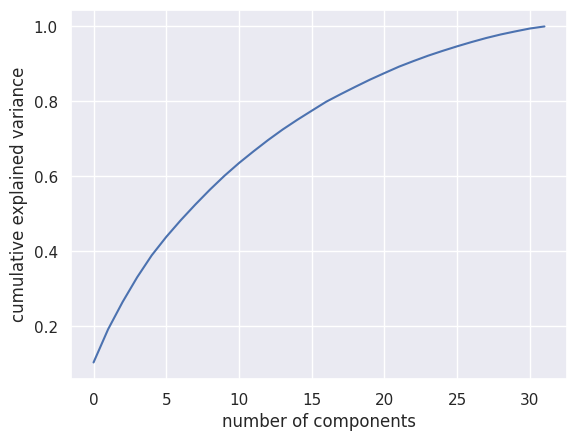

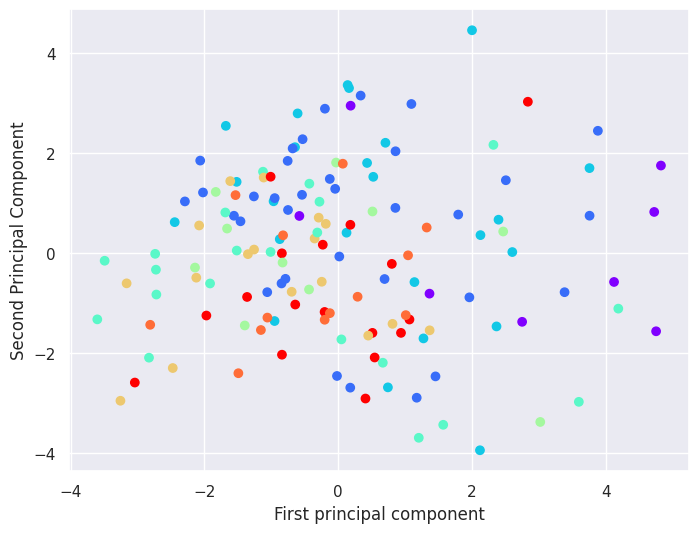

In [ ]:
studentdata = studentdata.drop('STUDENT ID', axis=1)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(studentdata)

scaled_data = scaler.transform(studentdata)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

#scaled_data.shape

#x_pca.shape

pca = PCA().fit(scaled_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=studentdata['GRADE'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')


# print(pca.components_)
#print(pca.explained_variance_)
print(pca.explained_variance_ratio_)


from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
df_orig = pca.inverse_transform(x_pca)
print(pd.DataFrame(df_orig).round().head())
x = scaler.inverse_transform(df_orig).round()
print(x)
studentdata.head()
#print(head(df_orig))

**PCA and Random Forest**

In [ ]:
from sklearn.model_selection import train_test_split

X = pd.DataFrame(studentdata)
X = X.iloc[:,0:31]
#print(X)

y = studentdata['GRADE']
#print(y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[0 2 1 0 0 0 0]
 [0 6 3 0 0 0 0]
 [0 4 1 0 0 0 0]
 [0 2 1 1 0 0 0]
 [0 3 0 0 0 0 0]
 [0 1 2 0 0 0 0]
 [0 0 0 0 0 0 2]]
0.3448275862068966


**Hopkins Statistics**

In [ ]:
!pip install --no-deps pyclustertend

In [ ]:
# k-Means
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyclustertend import hopkins
from sklearn.preprocessing import scale
%matplotlib inline

# Use pip command to install pyclustertend :pip install pyclustertend
# https://pyclustertend.readthedocs.io/_/downloads/en/master/pdf/

X = studentdata.drop(['Sex','GRADE','Weekly study hours'],axis=1)
X = scale(X)

# Hopkins Statistics
print("Hopkins Statistics:{:.3f}".format(hopkins(X,144))) # sampling size = 144

Hopkins Statistics:0.416


For the best results for clustering, the Hopkin's Statistic (between 0 and 1) should be closest to one. This results of 0.416 shows that while there is some tendancy for clustering, it may not be highly suitable.

**Elbow Method**

In [ ]:
kmeans_cluster = KMeans(n_clusters=6)
kmeans_pattern = kmeans_cluster.fit_predict(X)
print(kmeans_pattern)
kmeans_cluster.cluster_centers_
# Silhouette score
from sklearn.metrics import silhouette_score

print("Silhouette score:{:.3f}".format(silhouette_score(X, kmeans_pattern)))

[4 2 1 1 1 3 5 4 1 1 5 1 1 2 2 3 1 1 1 3 3 0 4 4 1 1 1 4 2 4 4 1 1 1 1 0 4
 1 1 1 4 2 1 4 1 1 1 1 1 1 4 1 1 2 0 4 4 4 4 1 4 2 1 2 1 4 0 0 1 3 1 4 3 3
 1 1 5 0 4 1 4 4 1 4 3 2 1 3 1 5 4 1 1 4 5 5 3 2 2 2 5 3 1 2 0 3 5 0 5 2 3
 2 2 0 0 3 2 5 0 5 0 3 2 5 3 5 2 5 0 0 3 3 3 3 2 5 3 5 5 0 3 3 5 3]
Silhouette score:0.053


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

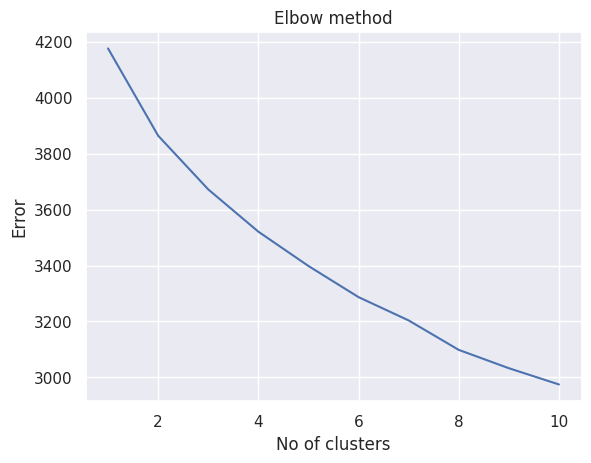

[1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[-0.37717836 -0.15598803  0.36624248 -0.18247917 -0.49419955  0.07389617
  -0.1611575   0.35382651  0.4614346   0.35633442  0.03361239 -0.43797047
  -0.05798935  0.53344892 -0.086751    0.09877296  0.0638994   0.45727788
   0.05716784 -0.30343604  0.23378125  0.1843702   0.24084306 -0.03452913
   0.05515283 -0.41688366 -0.0201611   0.14899225  0.77690502]
 [ 0.28518364  0.11794217 -0.27691505  0.13797205  0.37366307 -0.05587272
   0.12185079 -0.26752736 -0.34888957 -0.26942358 -0.02541425  0.3311484
   0.04384561 -0.40333943  0.06559222 -0.07468199 -0.04831418 -0.34574669
  -0.04322446  0.22942725 -0.17676143 -0.13940186 -0.18210085  0.02610739
  -0.04170092  0.31520472  0.01524376 -0.11265267 -0.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
Error =[]
for i in range(1, 11):
    kmeans_elbow = KMeans(n_clusters = i).fit(X)
    kmeans_elbow.fit(X)
    Error.append(kmeans_elbow.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

kmeans_cluster = KMeans(n_clusters=2)
kmeans_pattern = kmeans_cluster.fit_predict(X)
print(kmeans_pattern)
print(kmeans_cluster.cluster_centers_)

**Generation of Clusters**

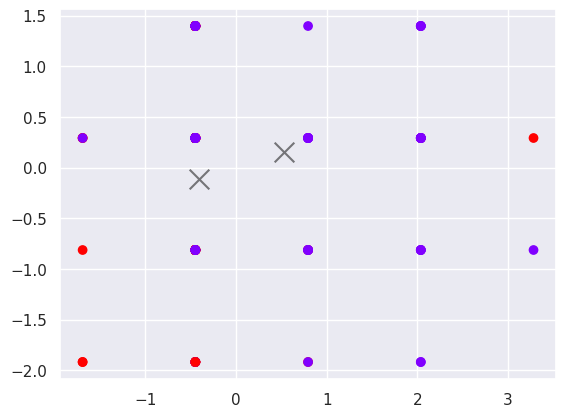

In [ ]:
plt.scatter(X[:, 13], X[:,27], c=kmeans_pattern, cmap='rainbow')
centers = kmeans_cluster.cluster_centers_
plt.scatter(centers[:, 13], centers[:, 27], c='black', s=200, alpha=0.5,marker='x')

**Agglomerative clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


[0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1
 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


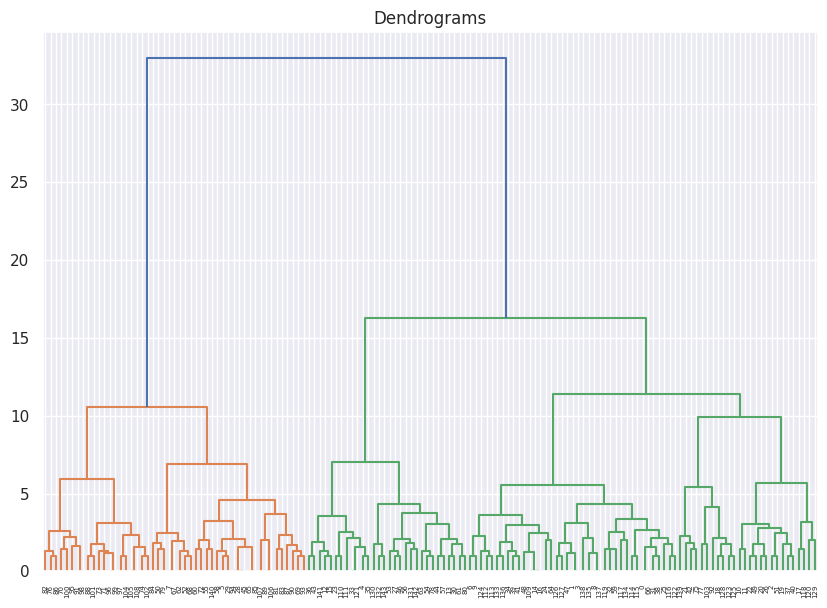

In [ ]:
import scipy.cluster.hierarchy as shc
X = studentdata[['Sex','Weekly study hours','GRADE','Cumulative grade point average in the last semester (/4.00)','Listening in classes','Reading frequency']]

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
print(cluster.fit_predict(X))


plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=600, color='r', linestyle='--')



Conclusion

  1. This project has found that a clustering alogrithm prediting a student's grade had a Hopkin's Statistic of 0.416. The clustering scatter plot reflected the fact that this data did not have a high tendancy to cluster.

  2. This dataset tracks variables that may affect the grade of students by catagorizing the data into bins. So for most of these variables, the value in the cell does not represent the actual value, but the quartile that the student lies in. I believe that this is what made this data not ideal for clustering. I think that the blockiness of the scatter plot reflects this.

  3. In a 2022 study in the Journal *Applied Sciences*, researchers ran multiple clustering models on data related to student's grades. They found that the optimized k-means model was the best performing and used 5 clusters. The goal of the study was to analyze this data to assist the government in reducing student drop-out rates, increasing graduation rates, and boosting post-graduation income by identifying the factors that increased student's grades in school.

Mohamed Nafuri AF, Sani NS, Zainudin NFA, Rahman AHA, Aliff M. Clustering Analysis for Classifying Student Academic Performance in Higher Education. Applied Sciences. 2022; 12(19):9467. https://doi.org/10.3390/app12199467

  4. I think that previous machine learning algorithms were better used on this dataset due to the data being in bins. It has been really helpful so far to run the same dataset through multiple algorithms. It has really helped me identify the differences between them. I think that in the future, I would want to run this algorithm on the demographic data from the UN that I used in the first project for this class. It has a lot of numeric data and a larger sample size. I learned from doing this project that that kind of data may be more ideal for clustering.
